In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1864,2020-10-05,United Kingdom,485061.0,502978.0,42396.0,42350.0,-17917.0,46.0
1865,2020-10-05,Germany,301408.0,300619.0,9549.0,9534.0,789.0,15.0
1866,2020-10-05,Iran,471370.0,471772.0,26977.0,26957.0,-402.0,20.0
1867,2020-10-05,Turkey,324167.0,324443.0,8437.0,8441.0,-276.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11946.171214553236
RMSE =  42511.41360383163


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  322.38897806313537
RMSE =  815.720345245808


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  88621.80113636363
RMSE =  134733.9152971979
-- World performances for deaths --
MAE =  1954.9147727272727
RMSE =  2379.8347309405563


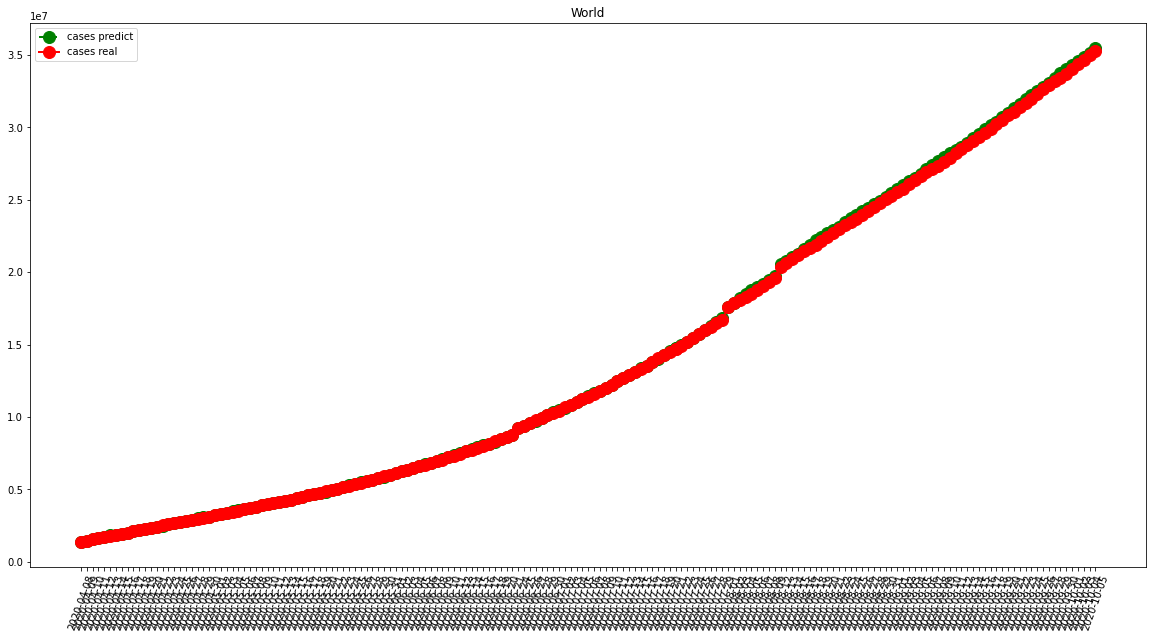

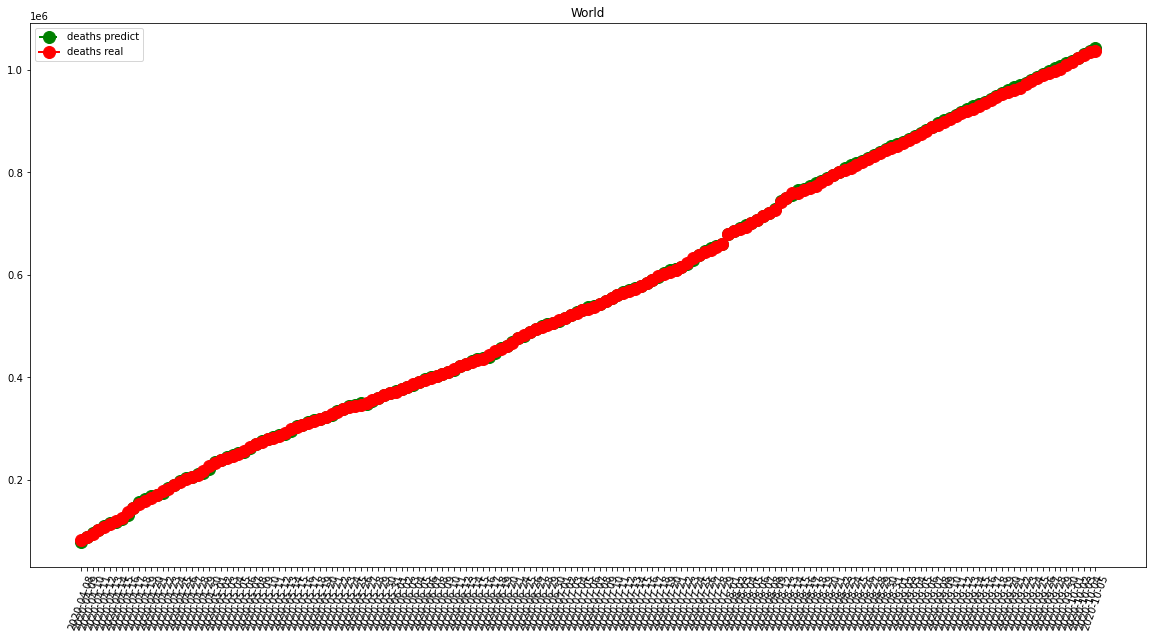

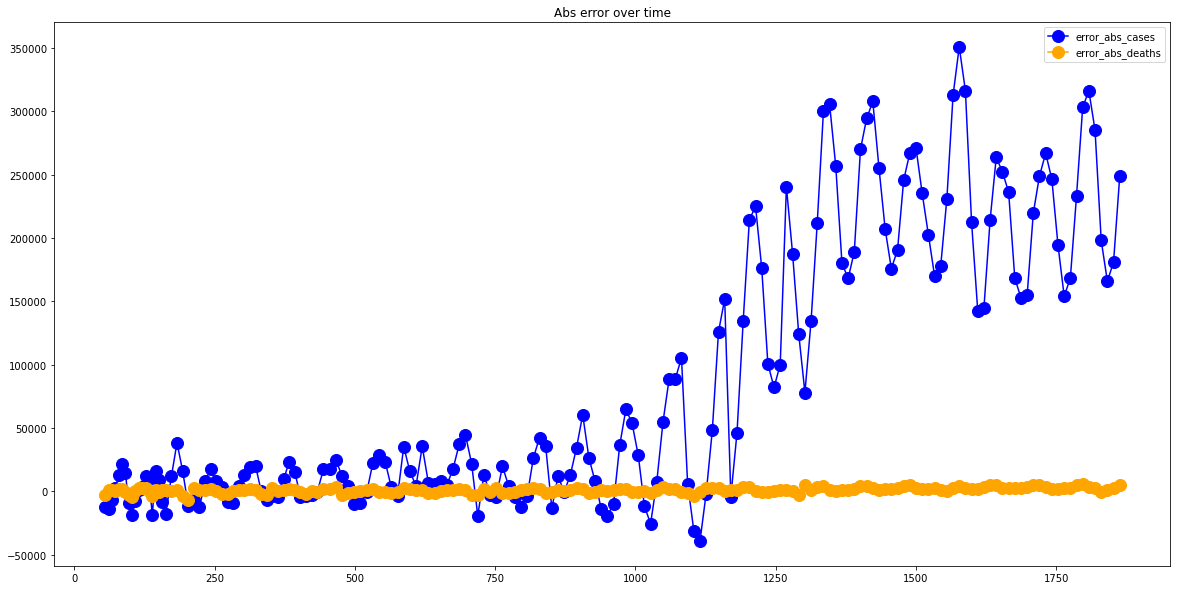

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1390.6451612903227
RMSE =  2179.8995660992205
-- France performances for deaths --
MAE =  106.8763440860215
RMSE =  246.83232957765313


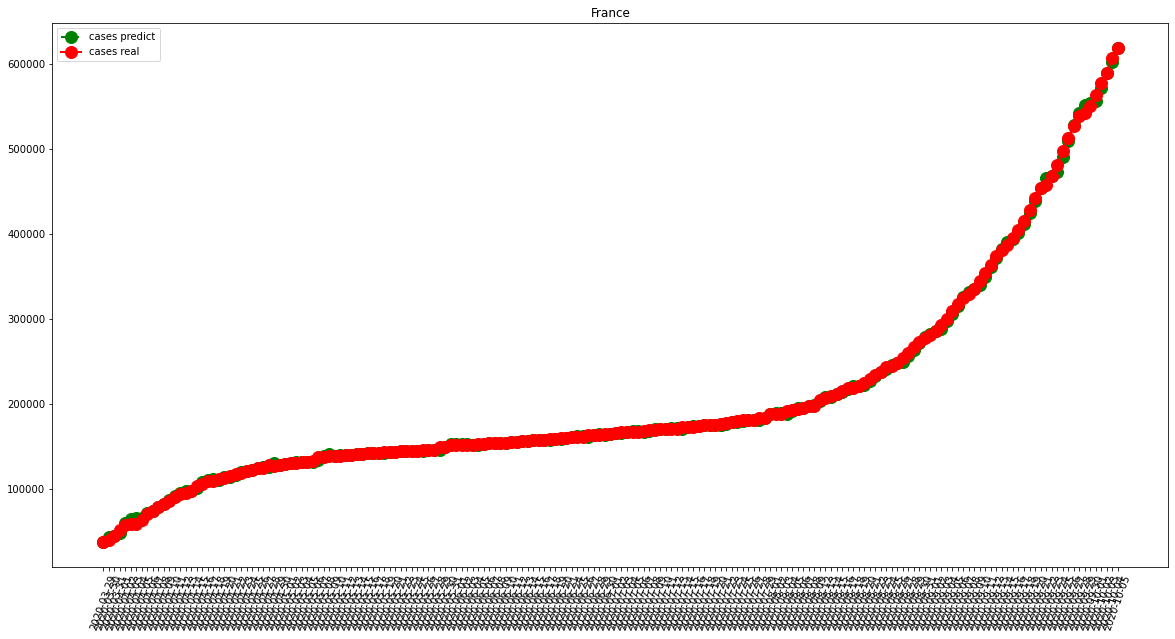

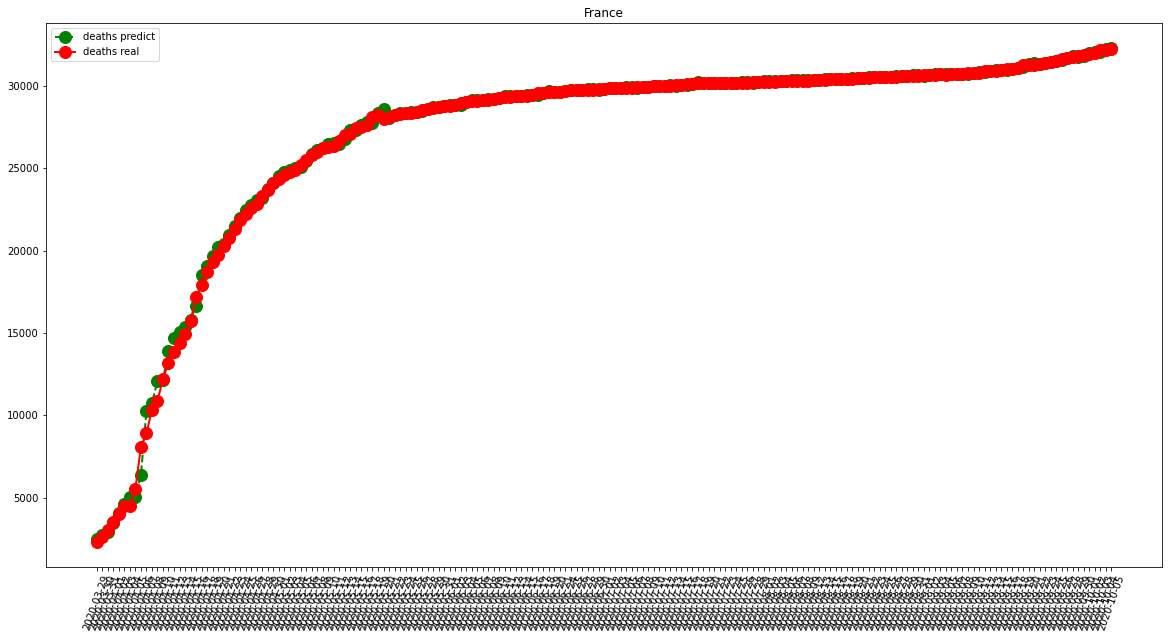

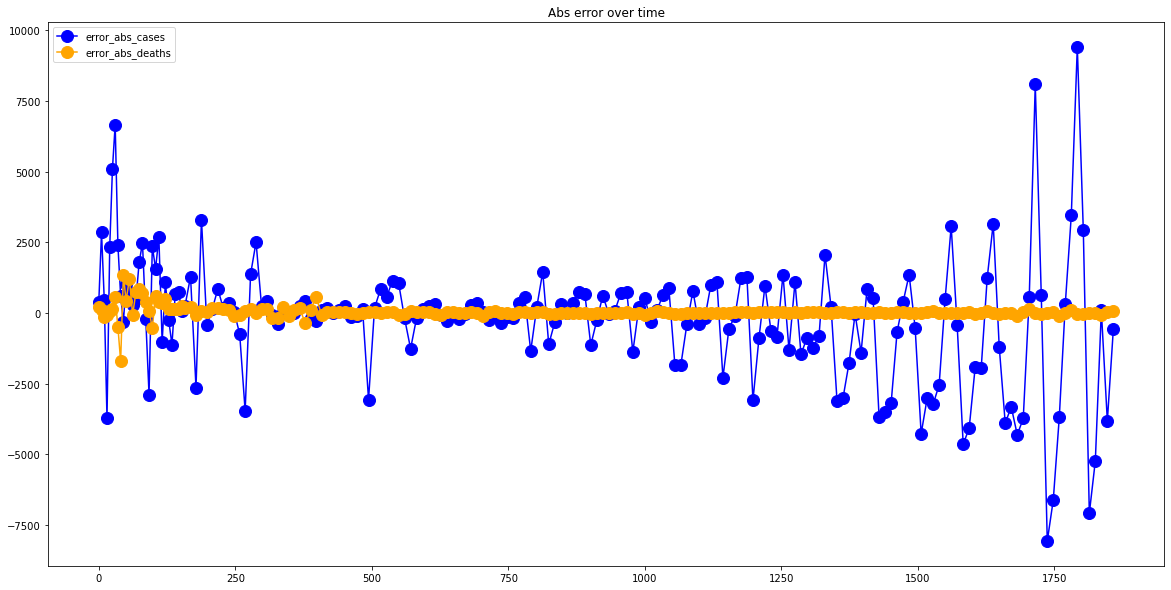

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  314.86559139784947
RMSE =  455.02303498349556
-- Italy performances for deaths --
MAE =  62.73118279569893
RMSE =  217.77007703450192


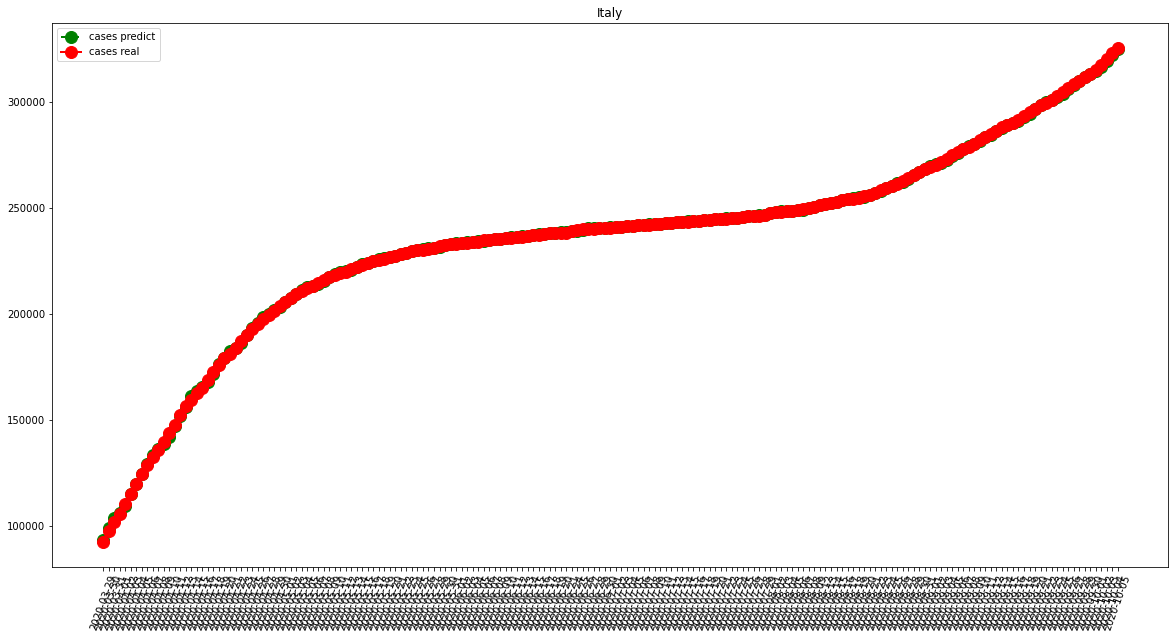

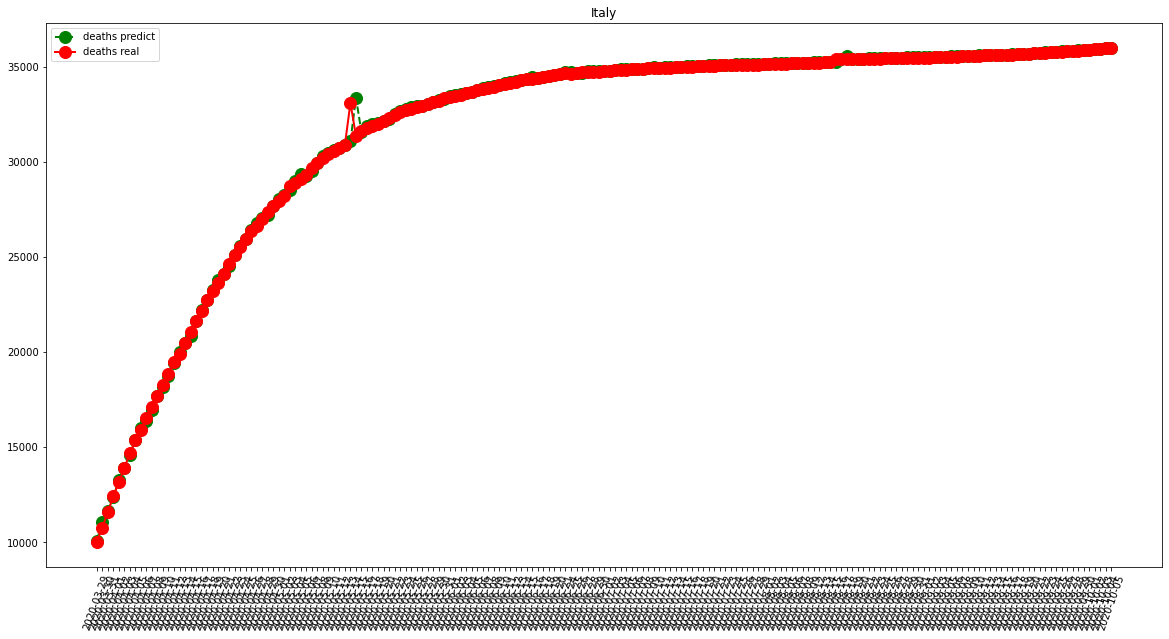

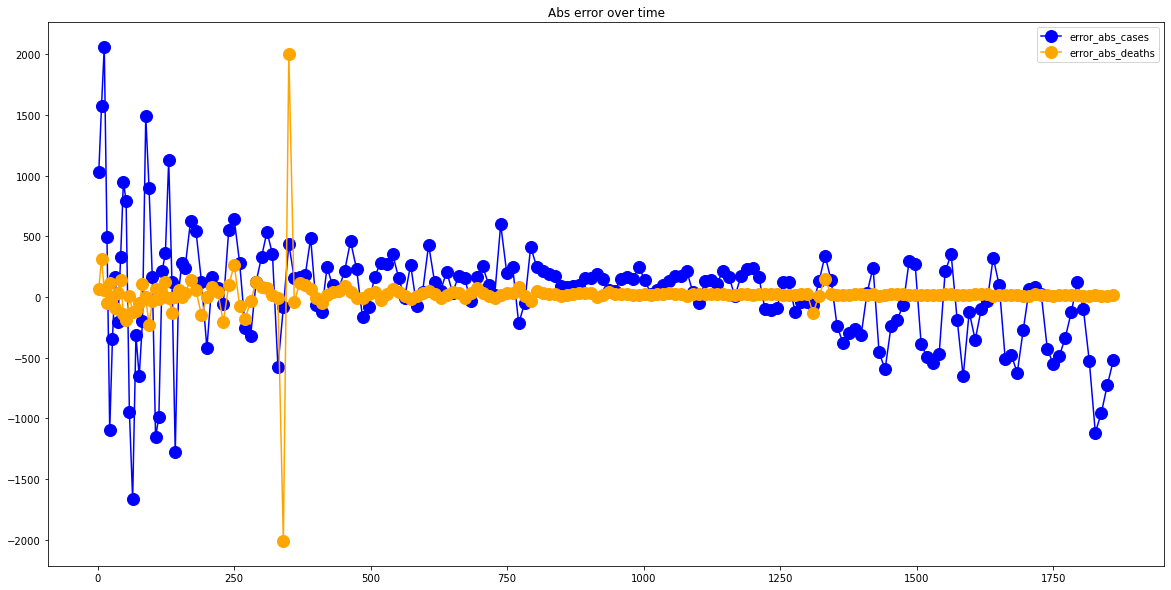

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2949.3817204301076
RMSE =  5689.363835688372
-- Spain performances for deaths --
MAE =  118.3763440860215
RMSE =  301.0834735825202


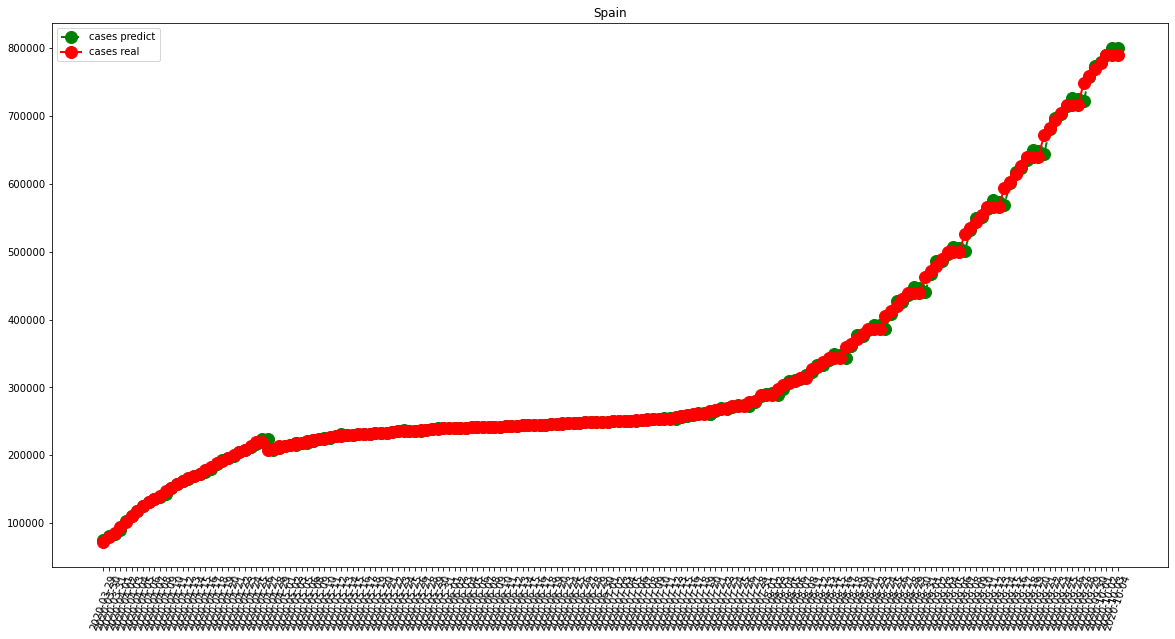

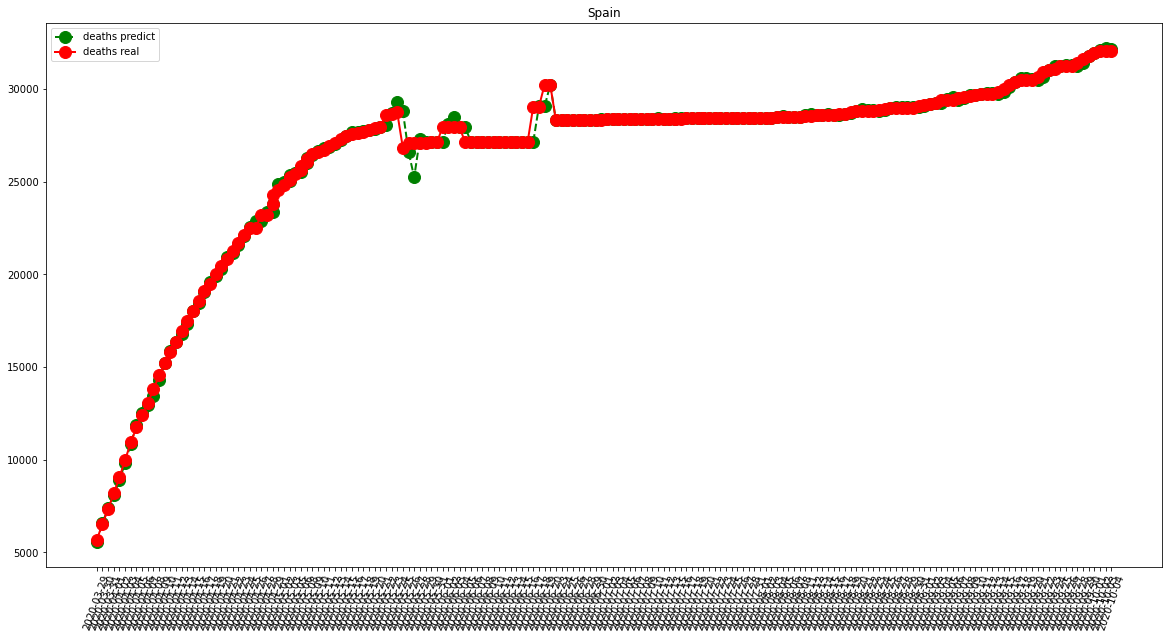

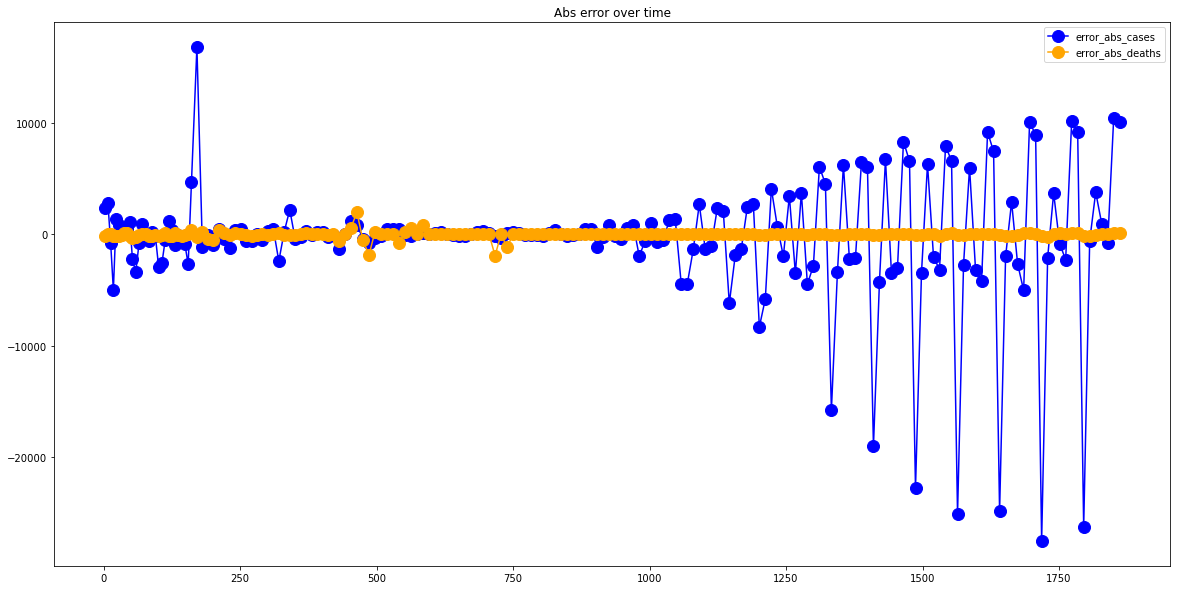

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16666.172043010753
RMSE =  23817.725417522895
-- United States performances for deaths --
MAE =  476.31720430107526
RMSE =  663.3425176324255


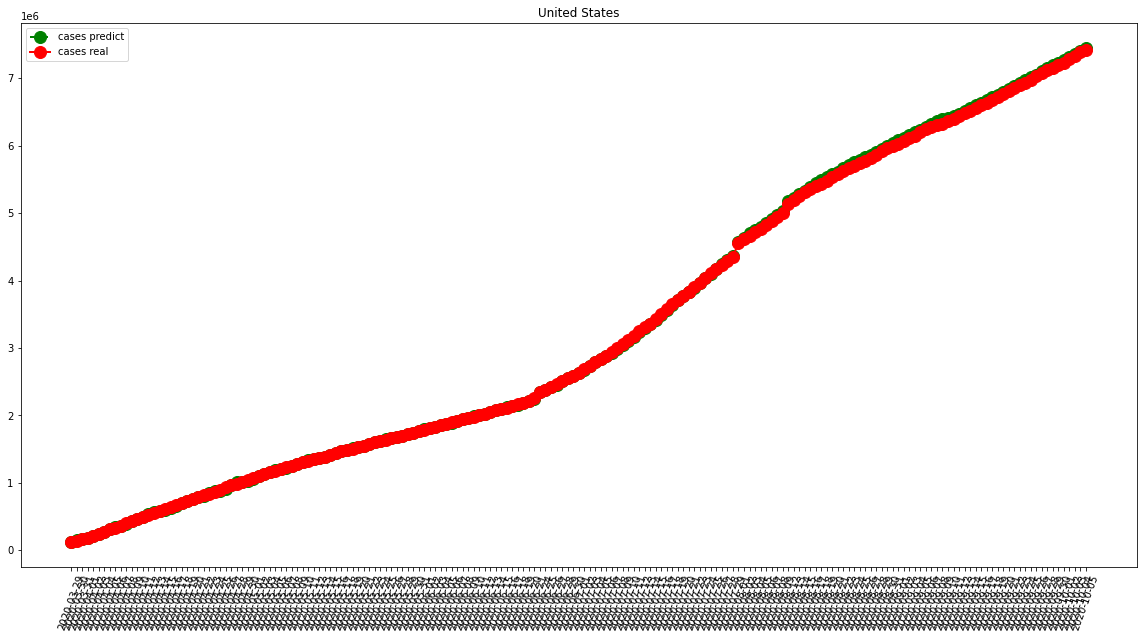

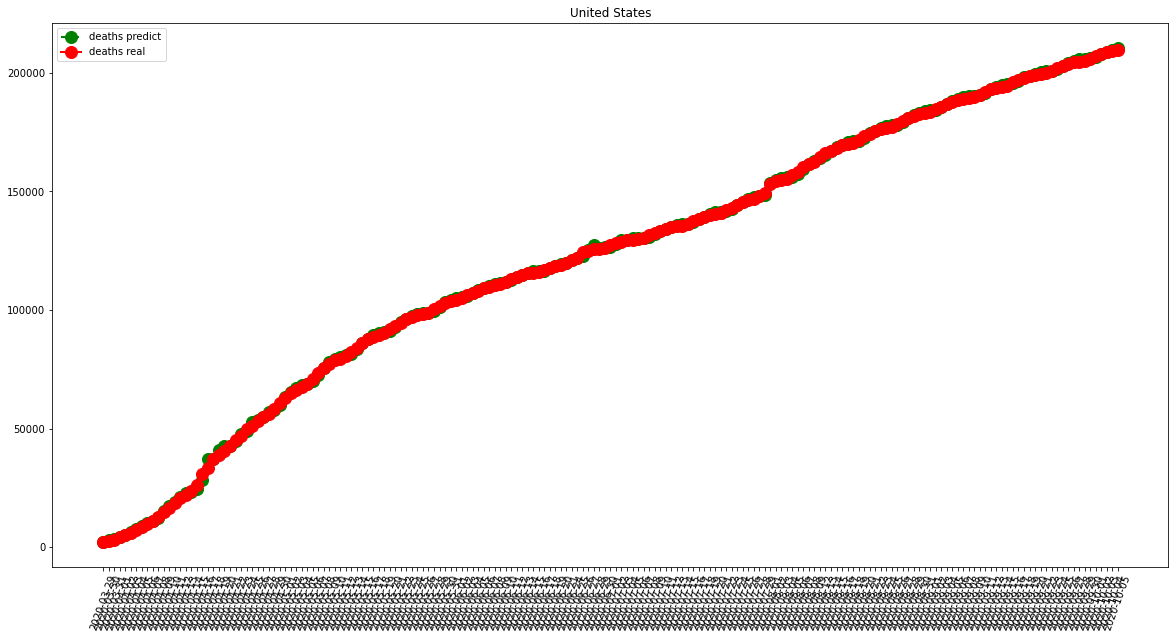

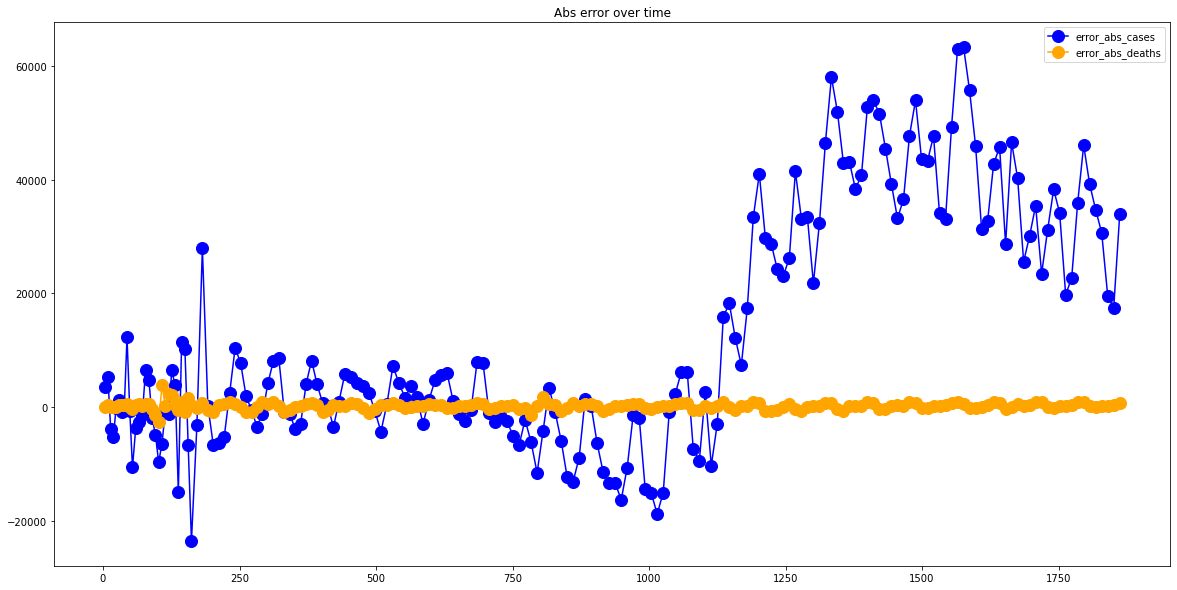

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  61.45161290322581
RMSE =  105.95561050670919
-- China performances for deaths --
MAE =  23.301075268817204
RMSE =  115.15487467445884


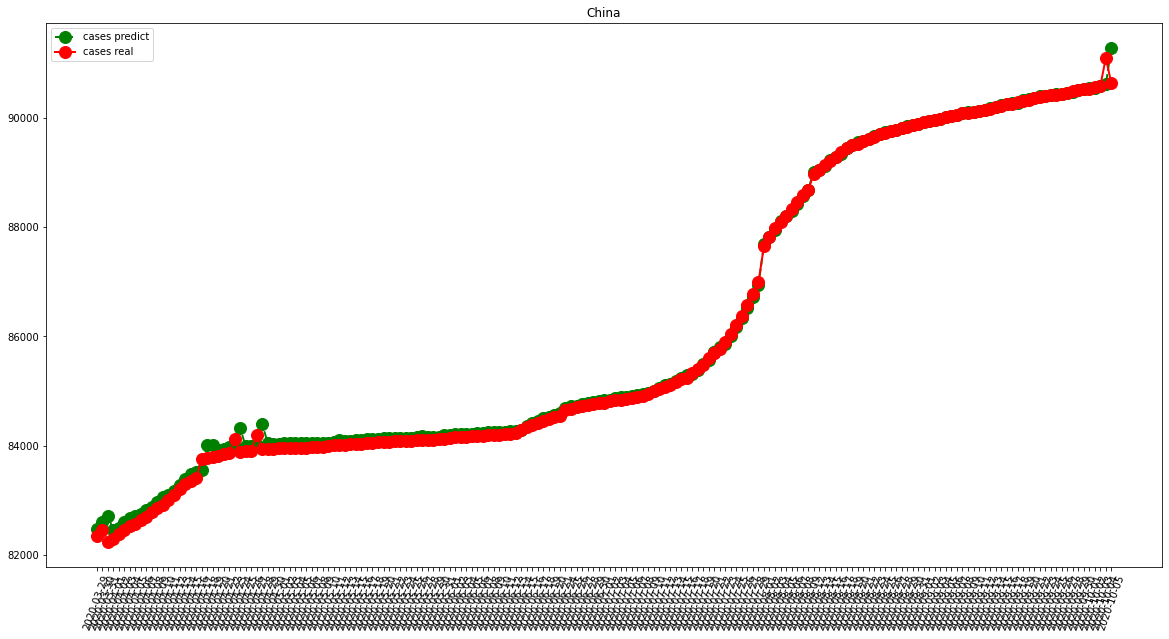

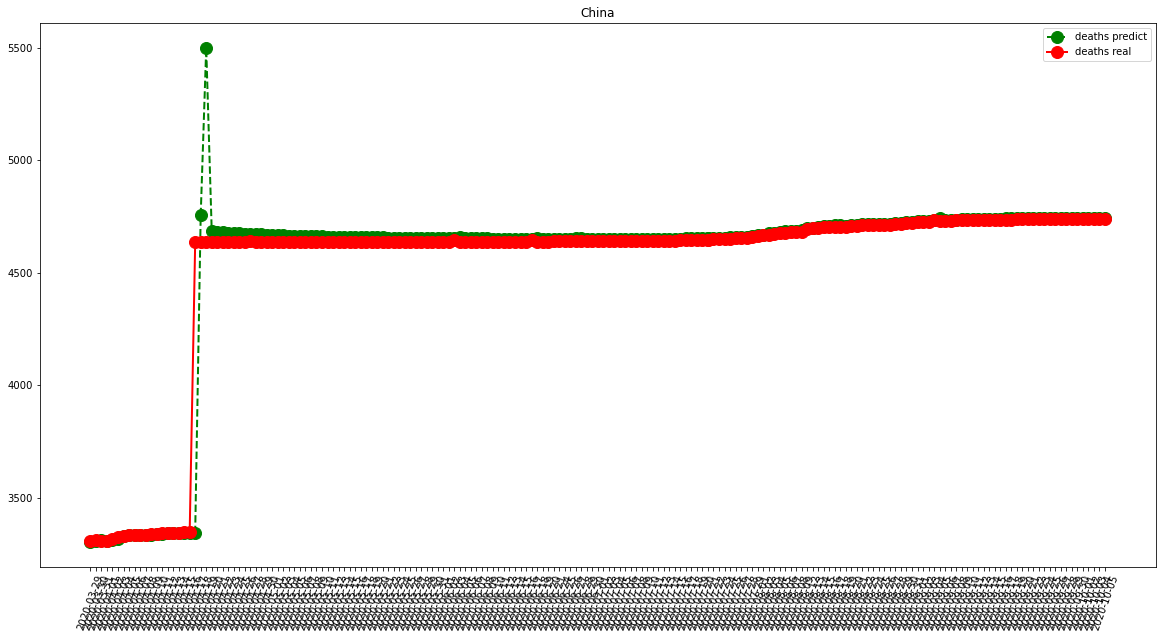

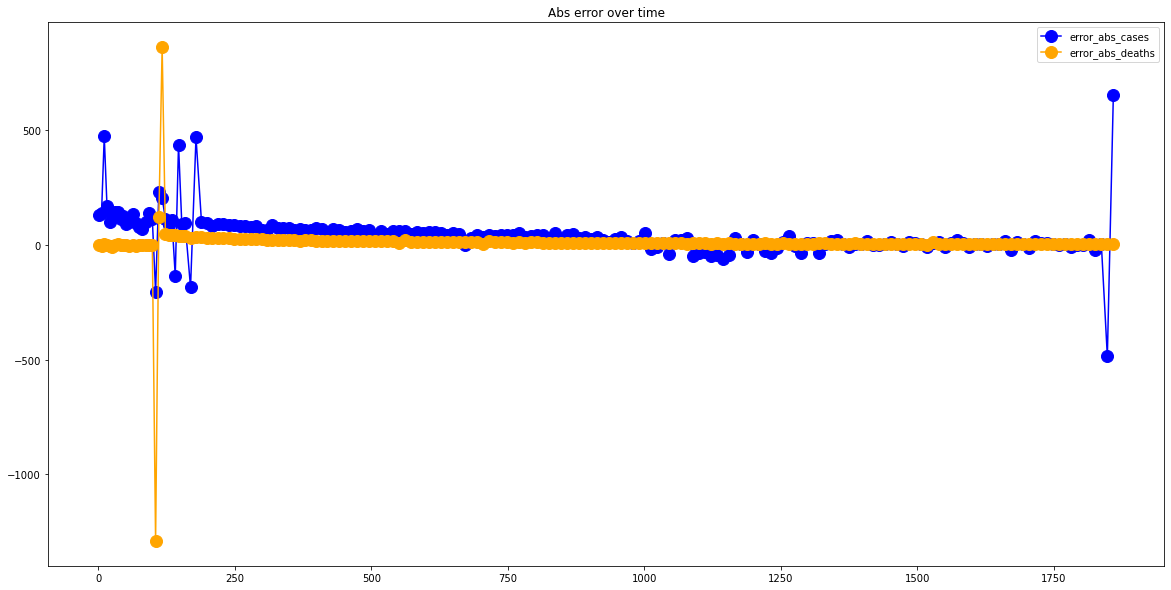

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1241.8417721518988
RMSE =  3735.378318663895
-- United Kingdom performances for deaths --
MAE =  197.48101265822785
RMSE =  679.0847805984952


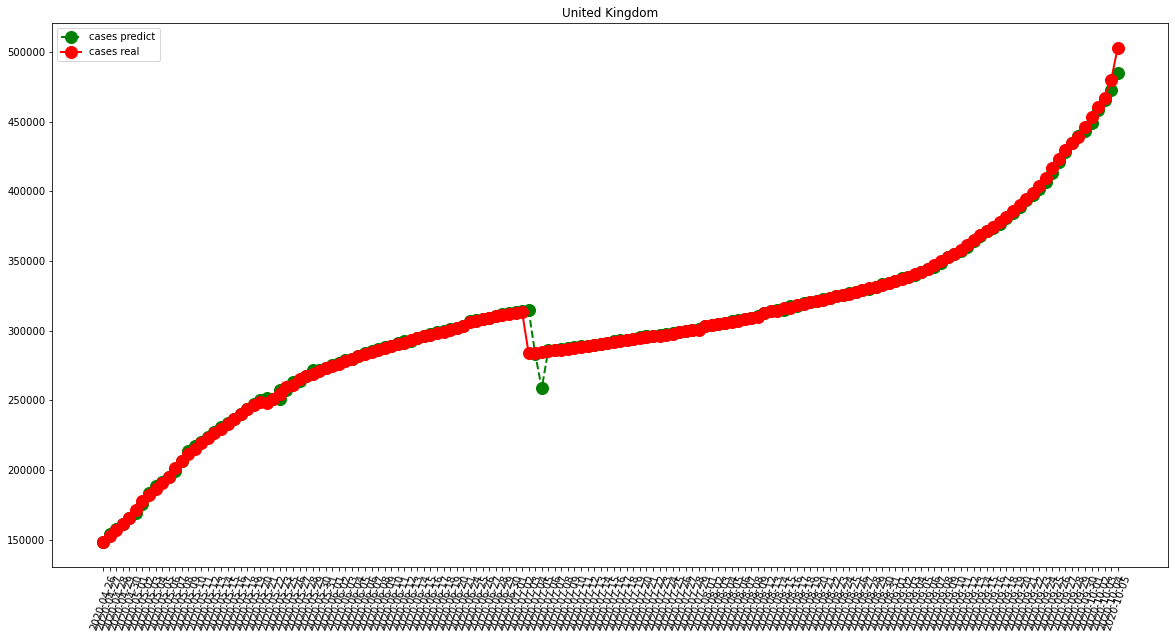

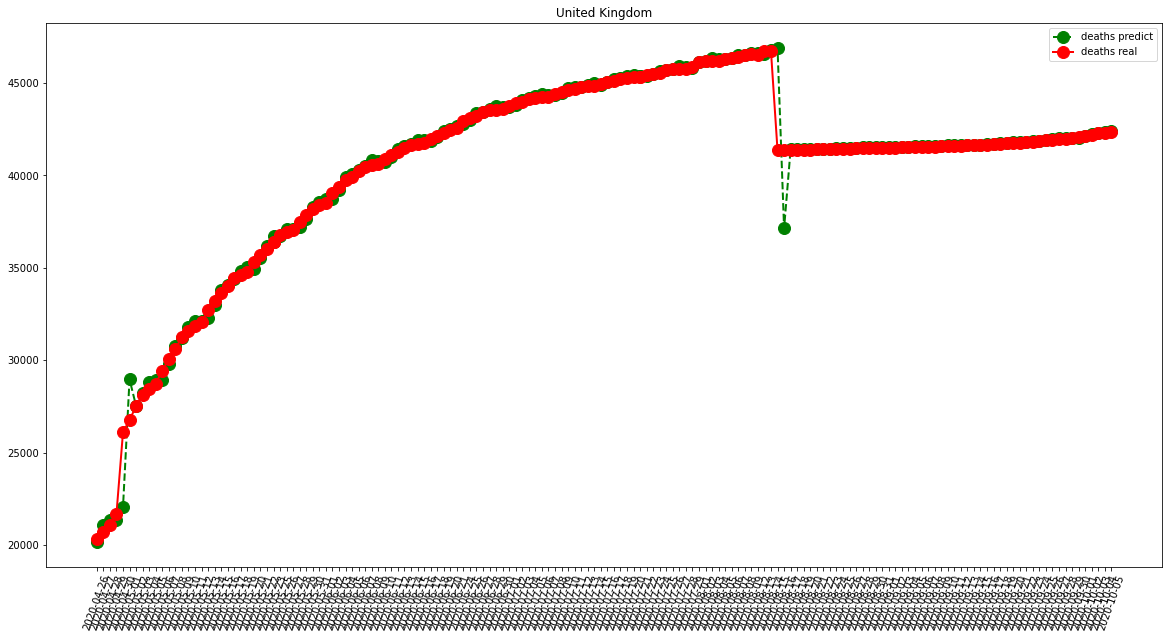

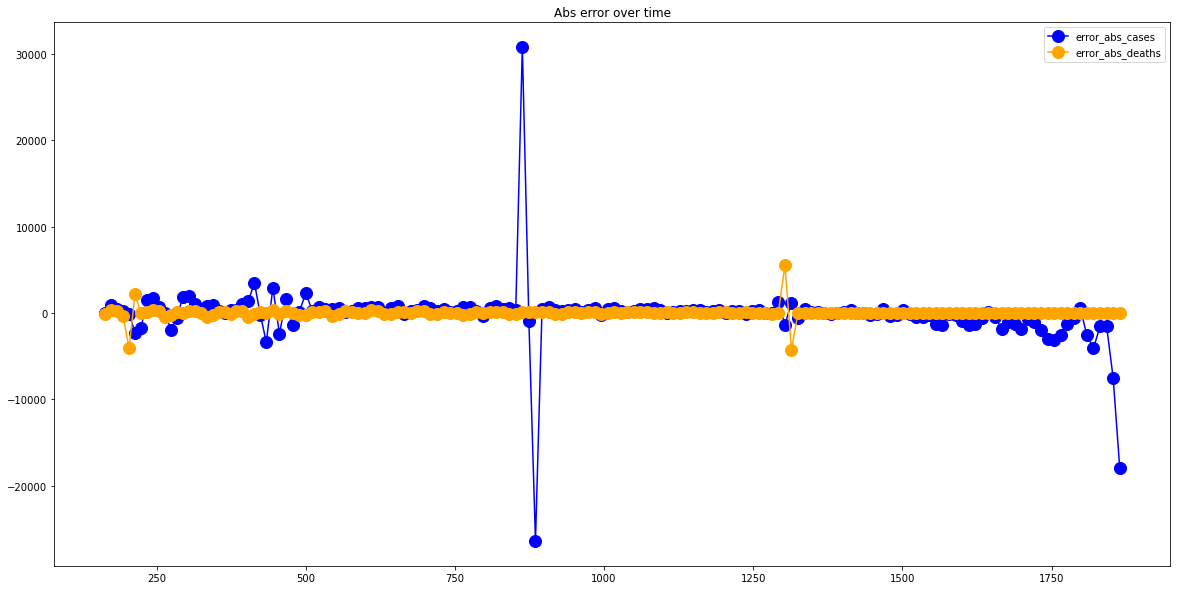

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  438.4746835443038
RMSE =  598.2529999078434
-- Germany performances for deaths --
MAE =  17.930379746835442
RMSE =  35.15472130994281


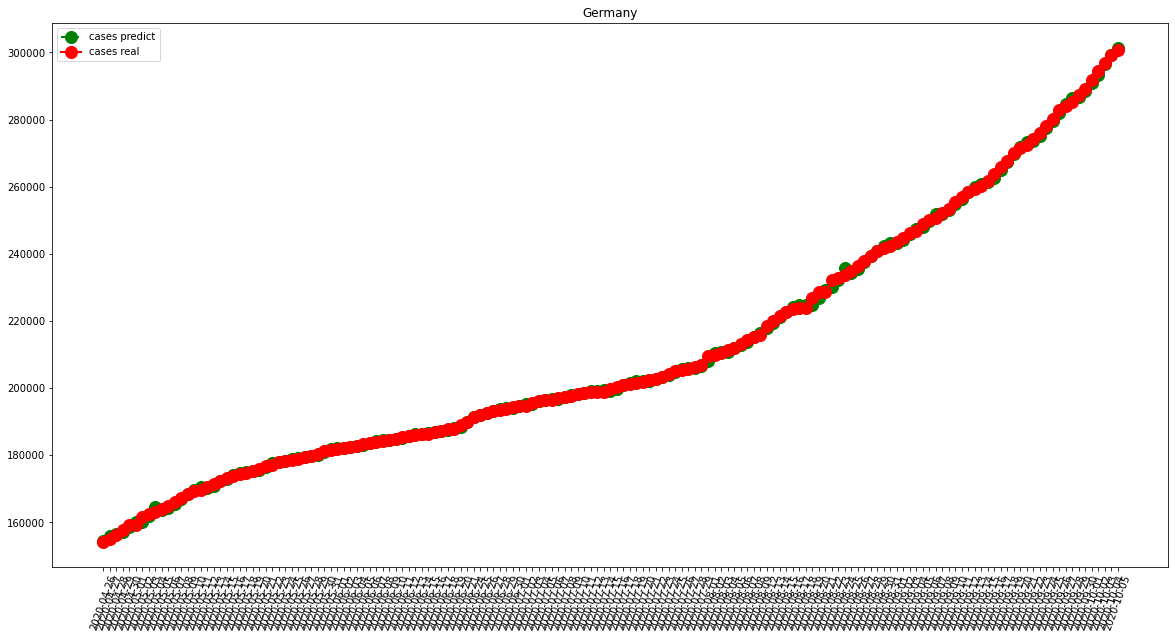

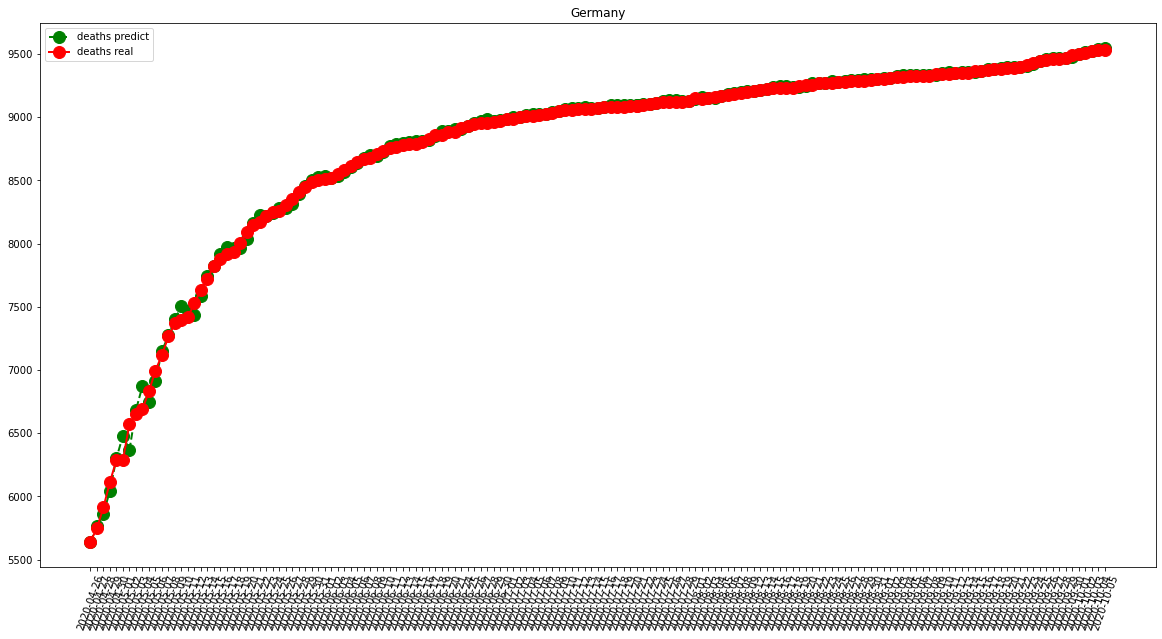

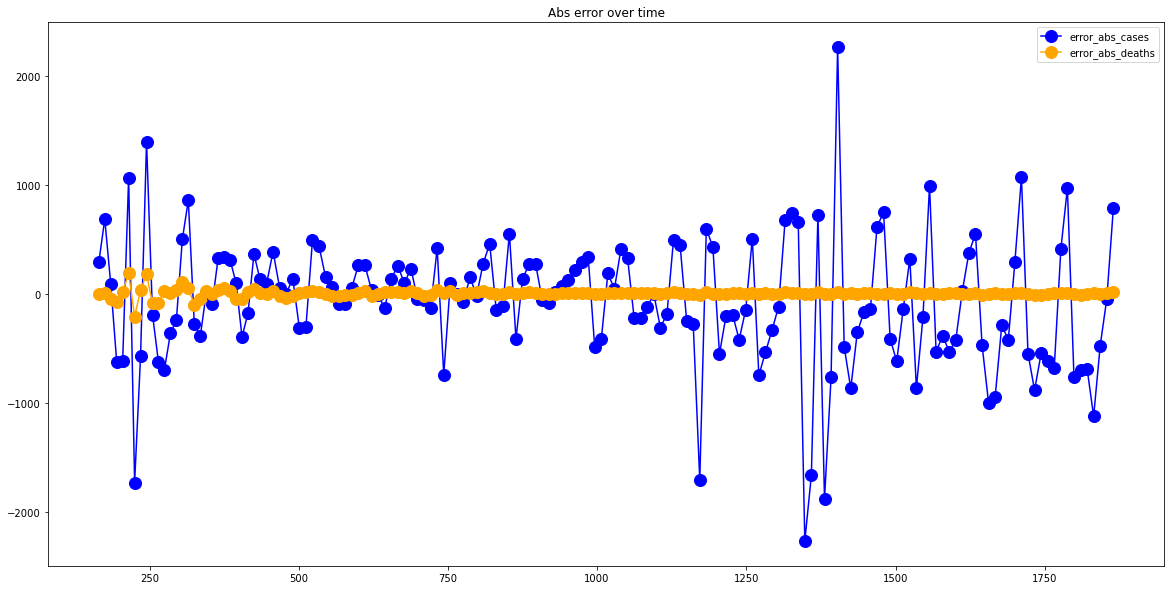

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  845.8227848101266
RMSE =  1187.9273781238492
-- Iran performances for deaths --
MAE =  49.27215189873418
RMSE =  81.84258586310365


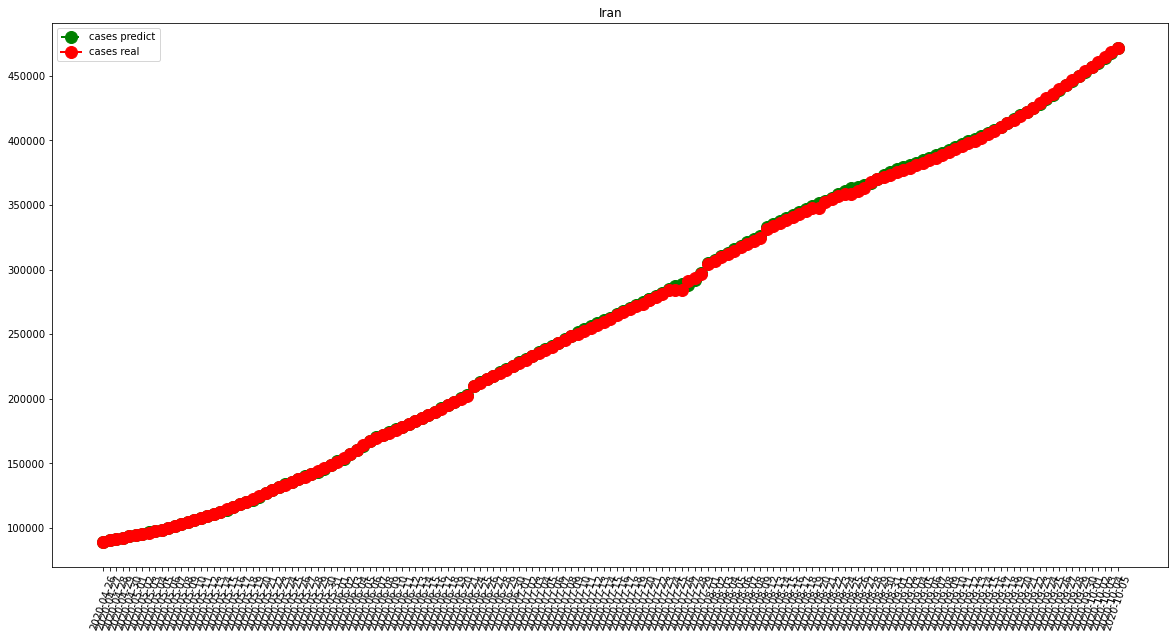

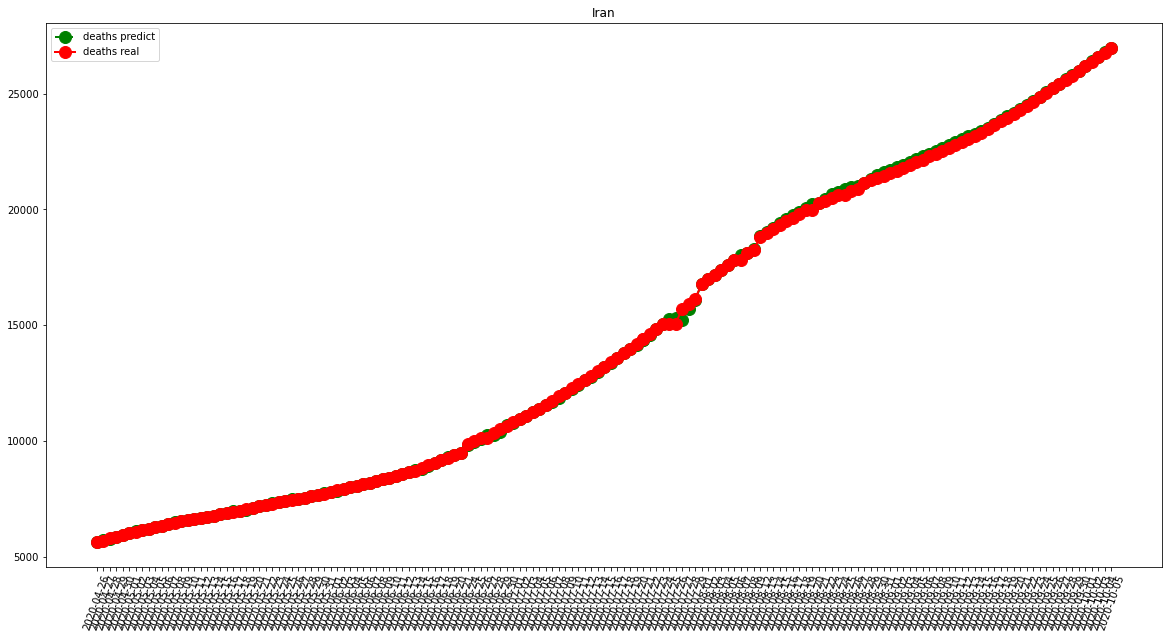

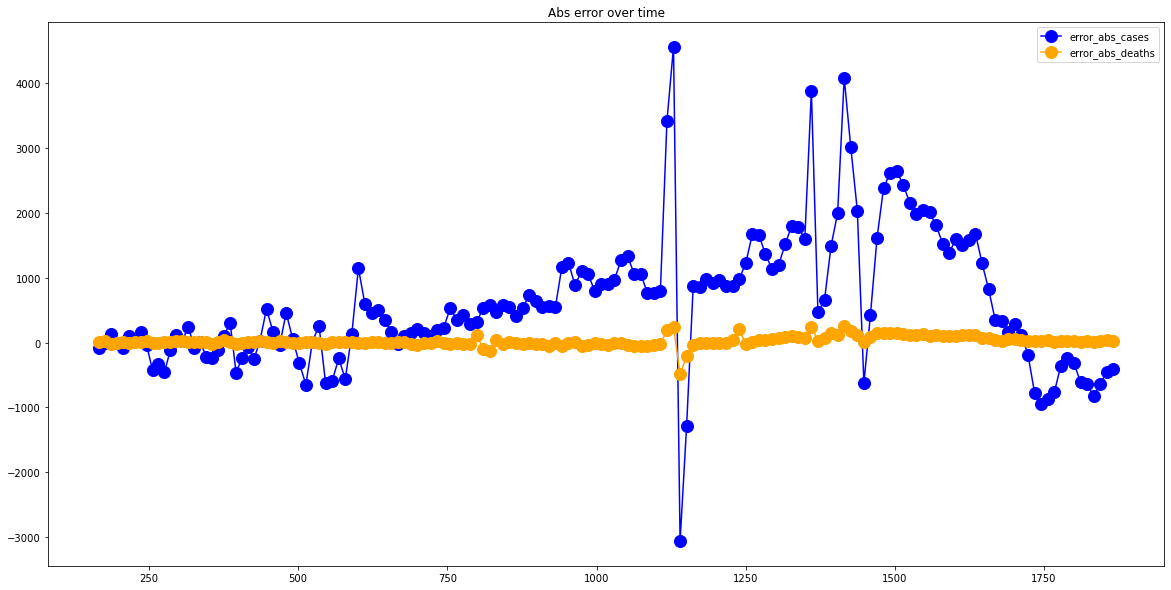

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  227.91139240506328
RMSE =  329.21877224727024
-- Turkey performances for deaths --
MAE =  15.49367088607595
RMSE =  81.0469468575881


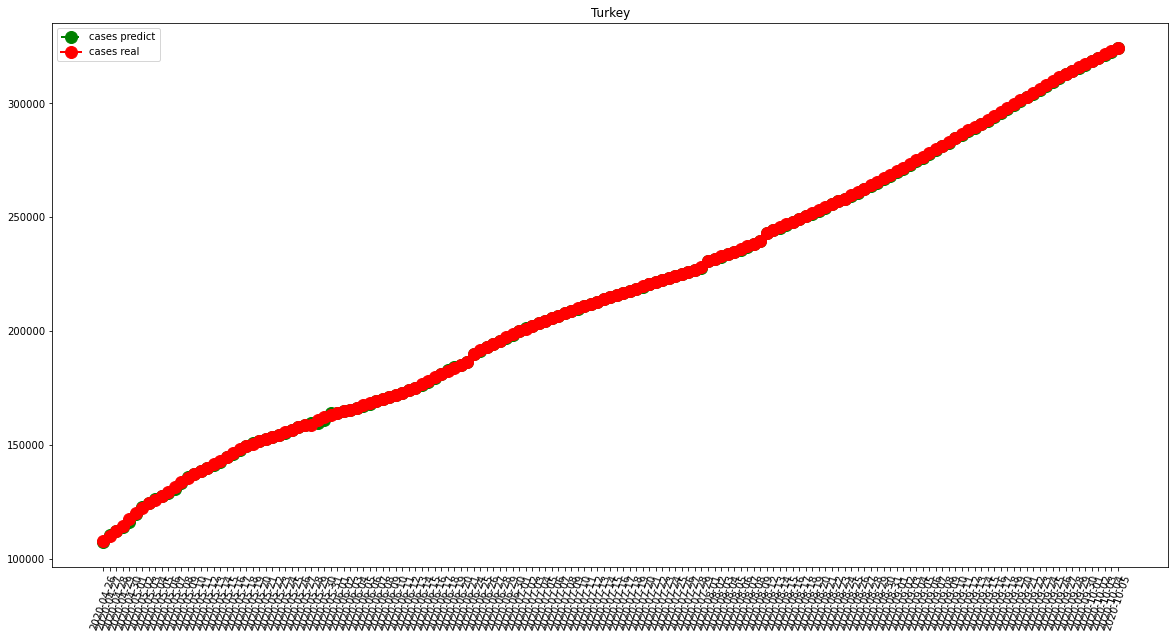

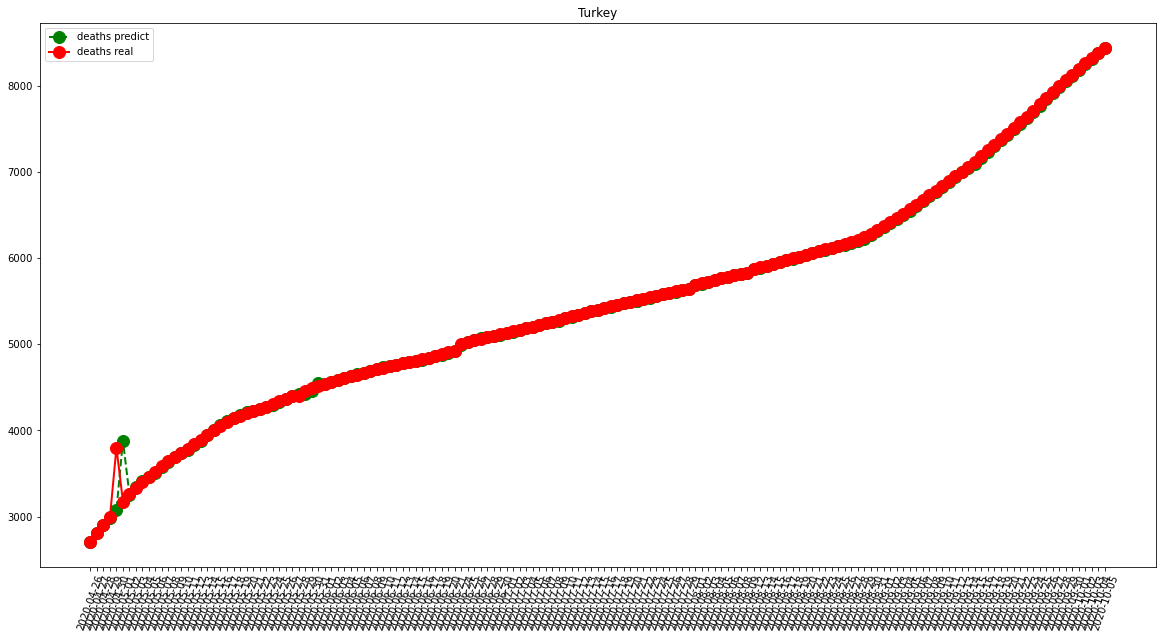

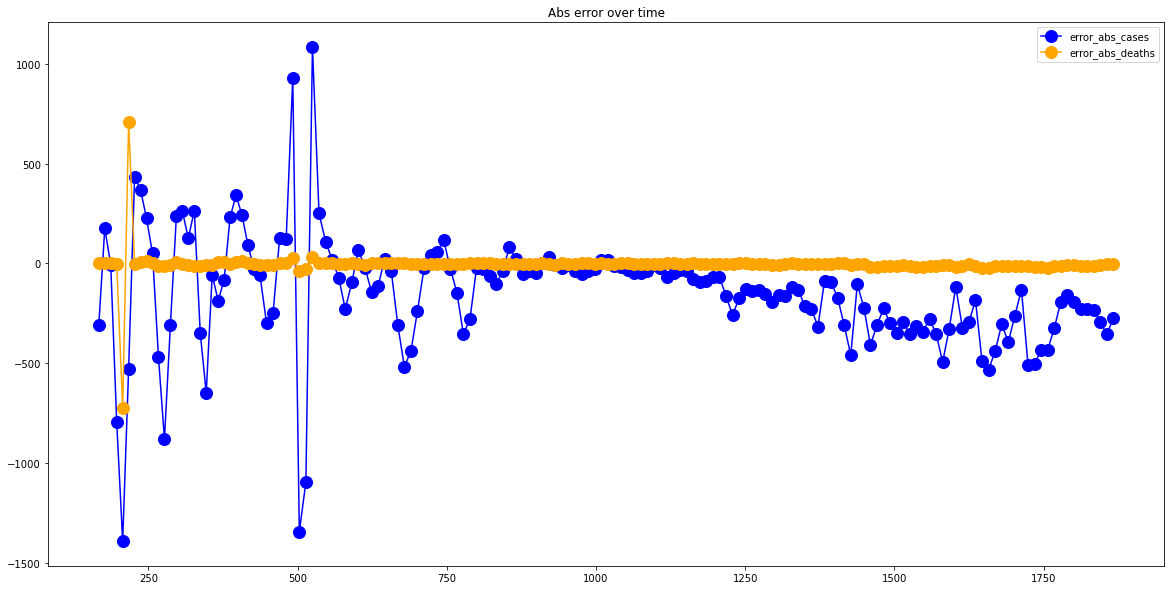

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17692.129770992367
RMSE =  22744.091509396156
-- Brazil performances for deaths --
MAE =  516.9312977099237
RMSE =  620.0031765493607


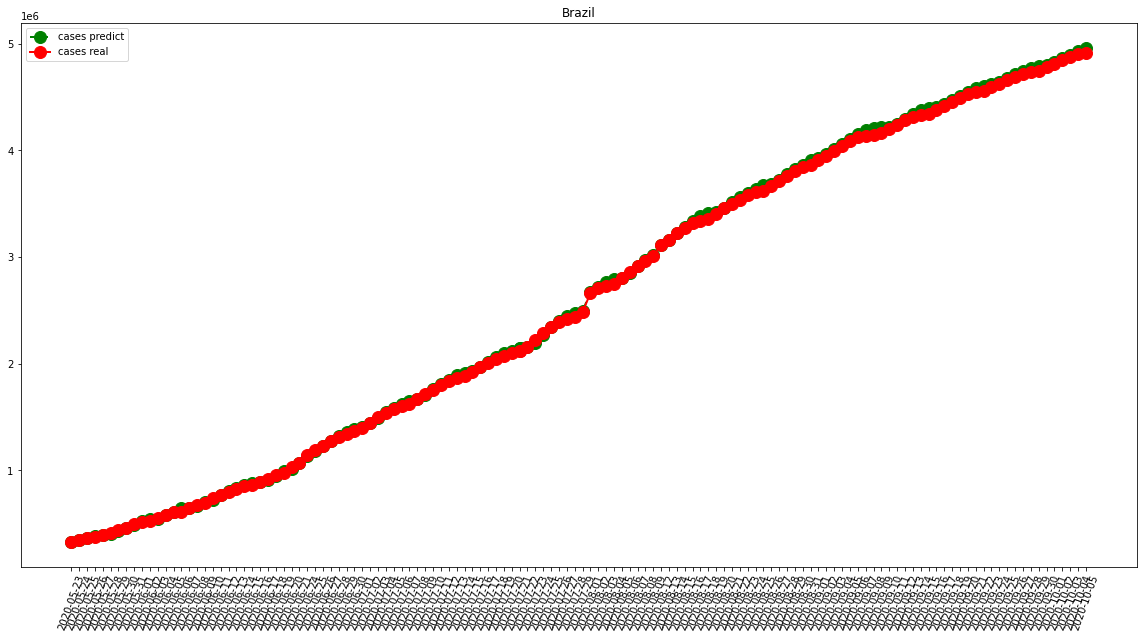

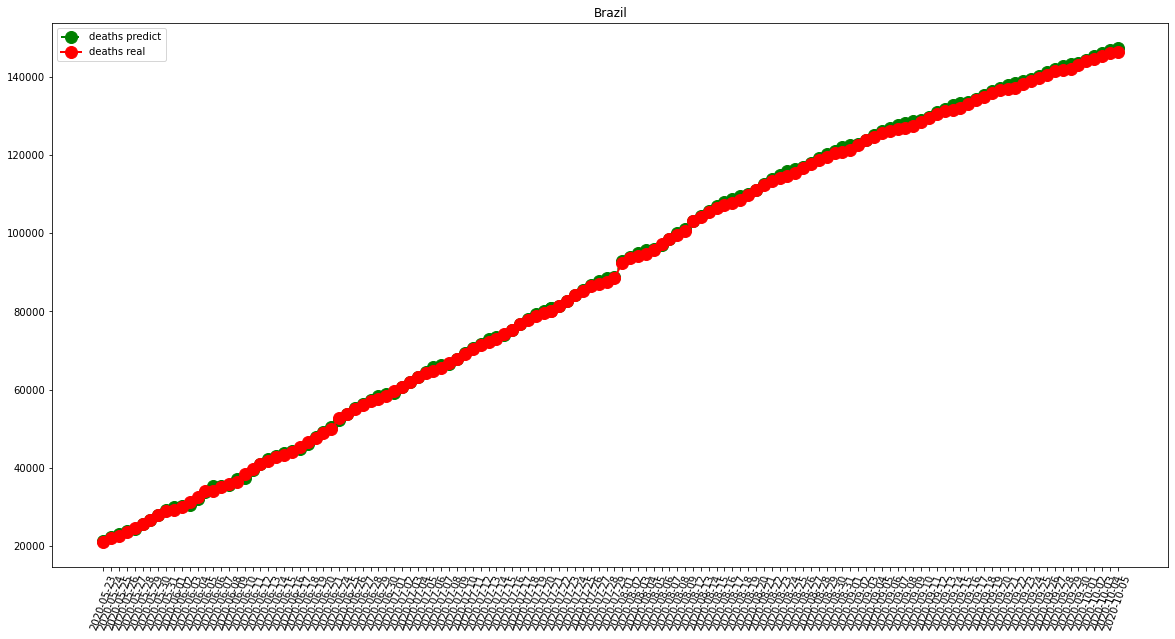

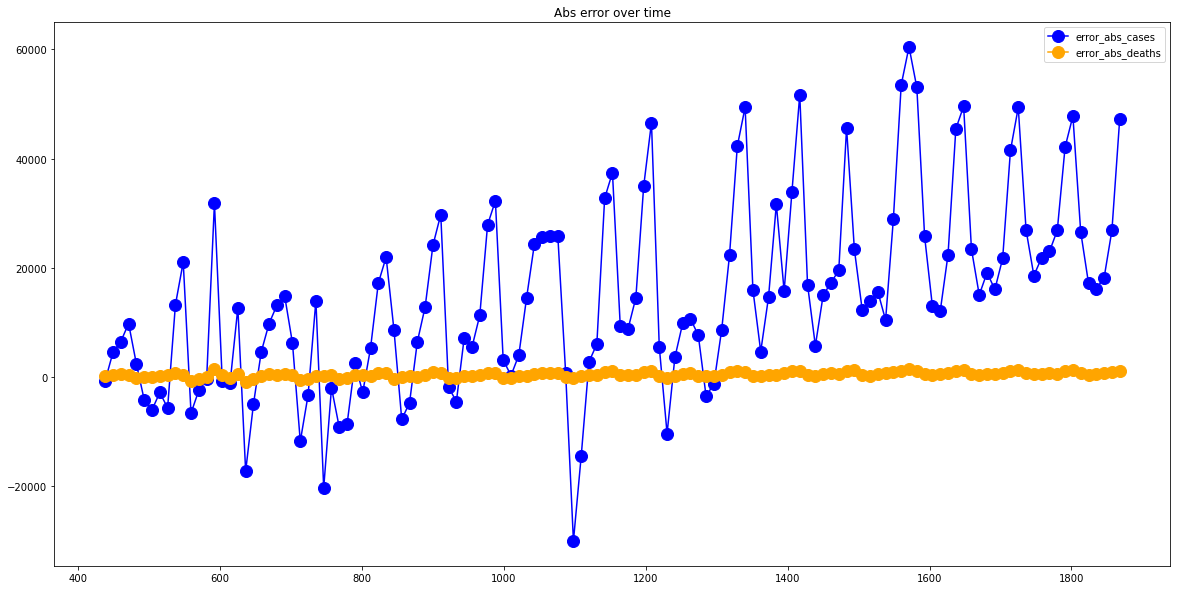

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)